# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.142290e+01     8.101344e+00
 * time: 0.0017359256744384766
     1     2.898681e+01     6.313579e+00
 * time: 0.008126020431518555
     2     1.935503e+01     4.466937e+00
 * time: 0.01559591293334961
     3     1.382822e+01     3.396233e+00
 * time: 0.021670818328857422
     4     1.285507e+01     4.301332e+00
 * time: 0.026559829711914062
     5     1.045591e+01     2.143681e+00
 * time: 0.03261089324951172
     6     9.414502e+00     2.779490e+00
 * time: 0.037457942962646484
     7     8.776711e+00     1.438252e+00
 * time: 0.042308807373046875
     8     8.487882e+00     9.647840e-01
 * time: 0.04732084274291992
     9     8.338918e+00     9.629991e-01
 * time: 0.0521388053894043
    10     8.251897e+00     7.651420e-01
 * time: 0.05710601806640625
    11     8.215137e+00     7.931700e-01
 * time: 0.06105685234069824
    12     8.137983e+00     5.662024e-01
 * time: 0.06518888473510742
    13     8.073107e+00     5.208474e-01
 *

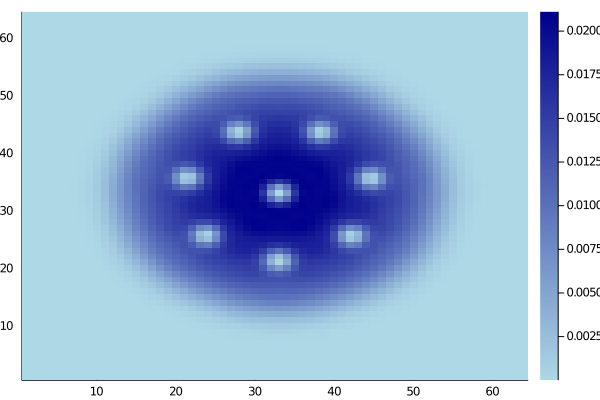

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)